In [11]:
%pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sech2(t, tau):
    return 1 / np.cosh(t/tau)**2

In [3]:
# Time array
t = np.linspace(-10, 10, 1000)  # Adjust range and number of points as needed

# Pulse parameters
tau = 1  # Pulse width parameter
P_peak = 1  # Peak power

In [4]:
pulse = P_peak * sech2(t, tau)

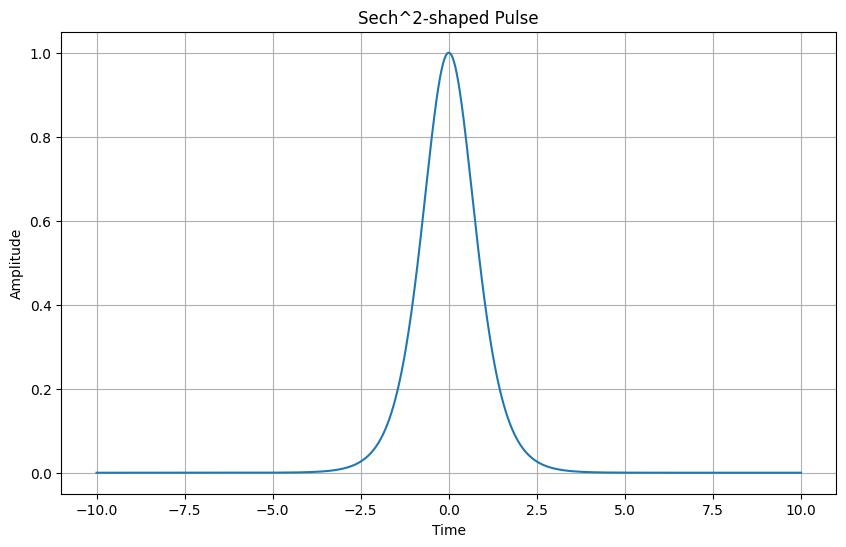

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, pulse)
plt.title('Sech^2-shaped Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [6]:
fwhm = 2 * tau * np.arccosh(np.sqrt(2))  # FWHM for sech^2 pulse
print(f"FWHM: {fwhm:.4f}")

FWHM: 1.7627


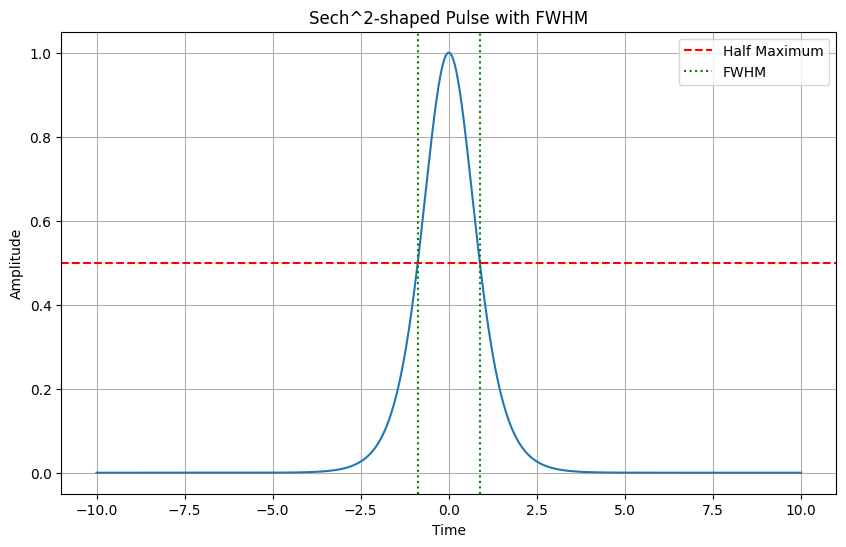

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, pulse)
plt.axhline(y=P_peak/2, color='r', linestyle='--', label='Half Maximum')
plt.axvline(x=-fwhm/2, color='g', linestyle=':', label='FWHM')
plt.axvline(x=fwhm/2, color='g', linestyle=':')
plt.title('Sech^2-shaped Pulse with FWHM')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

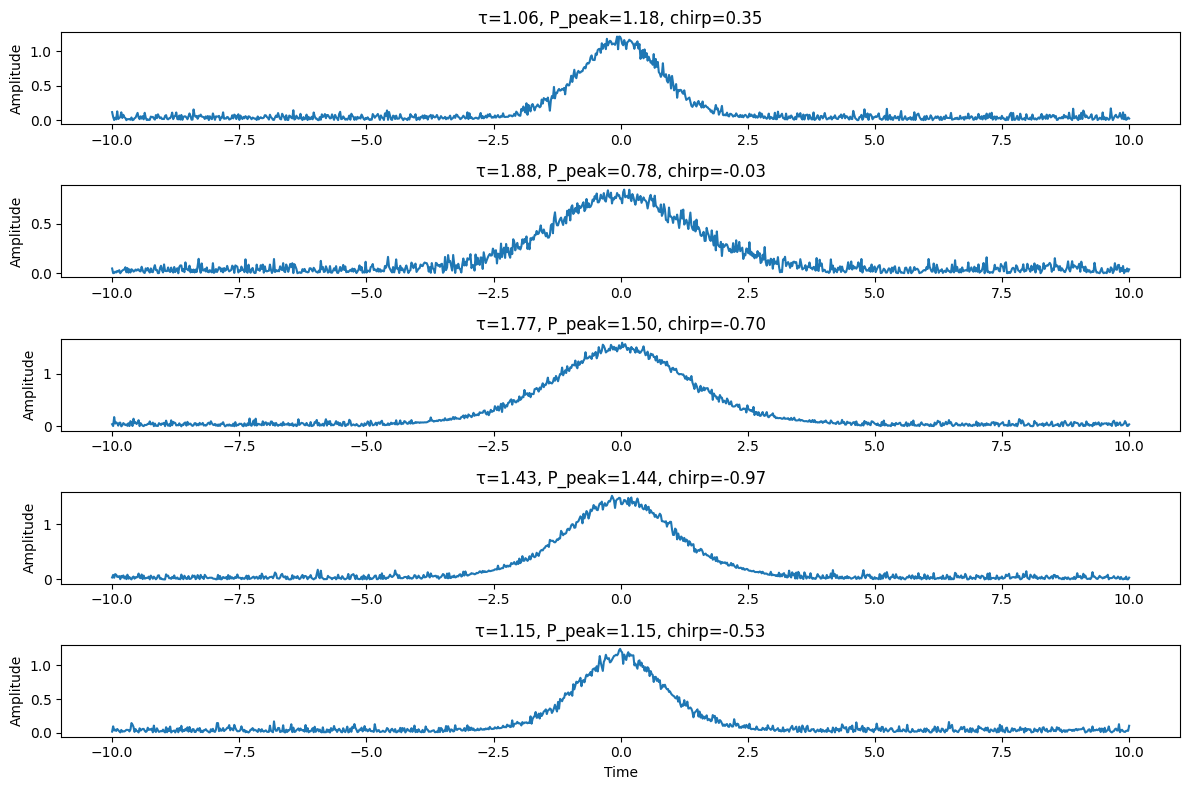

Sample 1: τ=1.06, P_peak=1.18, chirp=0.35
Sample 2: τ=1.88, P_peak=0.78, chirp=-0.03
Sample 3: τ=1.77, P_peak=1.50, chirp=-0.70
Sample 4: τ=1.43, P_peak=1.44, chirp=-0.97
Sample 5: τ=1.15, P_peak=1.15, chirp=-0.53


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sech2(t, tau):
    return 1 / np.cosh(t/tau)**2

def generate_sech2_pulse(t, tau, P_peak, chirp=0):
    """Generate a sech^2 pulse with optional chirp"""
    pulse = P_peak * sech2(t, tau)
    phase = 0.5 * chirp * (t/tau)**2
    return pulse * np.exp(1j * phase)

def generate_sample(t, tau_range, P_peak_range, chirp_range, noise_level=0.05):
    """Generate a sample with random parameters"""
    tau = np.random.uniform(*tau_range)
    P_peak = np.random.uniform(*P_peak_range)
    chirp = np.random.uniform(*chirp_range)

    pulse = generate_sech2_pulse(t, tau, P_peak, chirp)

    # Add some noise
    noise = np.random.normal(0, noise_level, len(t))
    noisy_pulse = pulse + noise

    return noisy_pulse, (tau, P_peak, chirp)

# Set up time array
t = np.linspace(-10, 10, 1000)

# Parameter ranges
tau_range = (0.5, 2.0)
P_peak_range = (0.5, 1.5)
chirp_range = (-1, 1)

# Generate multiple samples
n_samples = 5
samples = []
params = []

for _ in range(n_samples):
    sample, param = generate_sample(t, tau_range, P_peak_range, chirp_range)
    samples.append(sample)
    params.append(param)

# Plot the samples
plt.figure(figsize=(12, 8))
for i, (sample, param) in enumerate(zip(samples, params)):
    plt.subplot(n_samples, 1, i+1)
    plt.plot(t, np.abs(sample))
    plt.title(f"τ={param[0]:.2f}, P_peak={param[1]:.2f}, chirp={param[2]:.2f}")
    plt.ylabel("Amplitude")

plt.xlabel("Time")
plt.tight_layout()
plt.show()

# Print parameters for each sample
for i, param in enumerate(params):
    print(f"Sample {i+1}: τ={param[0]:.2f}, P_peak={param[1]:.2f}, chirp={param[2]:.2f}")

Reloading Tuner from tuner_dir/soliton_classifier/tuner0.json
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7745 - loss: 0.5649 - val_accuracy: 0.6187 - val_loss: 0.4721
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9639 - loss: 0.0874 - val_accuracy: 0.6938 - val_loss: 0.4264
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9966 - loss: 0.0378 - val_accuracy: 0.9688 - val_loss: 0.1962
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9943 - loss: 0.0226 - val_accuracy: 1.0000 - val_loss: 0.0871
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9957 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 0.0452
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9997 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0308
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9922 - loss: 0.0202 - val_accuracy: 0.9937 - val_loss: 0.0247
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

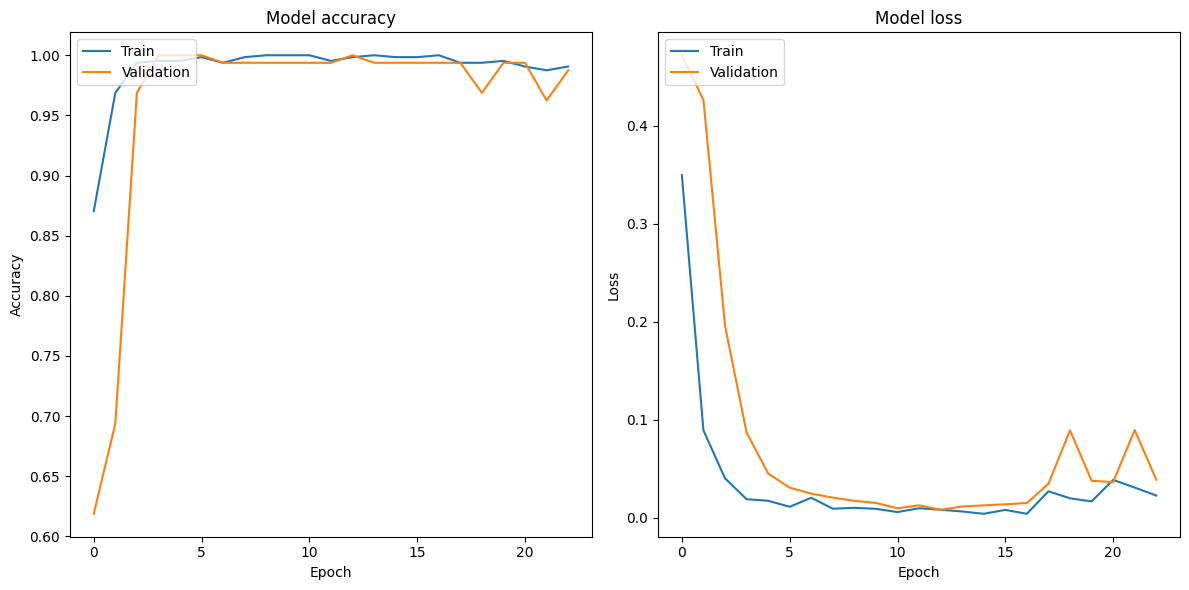

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch

def sech2(t, tau):
    return 1 / np.cosh(t/tau)**2

def generate_sech2_pulse(t, tau, P_peak, chirp=0):
    """Generate a sech^2 pulse with optional chirp"""
    pulse = P_peak * sech2(t, tau)
    phase = 0.5 * chirp * (t/tau)**2
    return pulse * np.exp(1j * phase)

def generate_sample(t, tau_range, P_peak_range, chirp_range, noise_level=0.05, label=1):
    """Generate a sample with random parameters and a label"""
    tau = np.random.uniform(*tau_range)
    P_peak = np.random.uniform(*P_peak_range)
    chirp = np.random.uniform(*chirp_range)

    pulse = generate_sech2_pulse(t, tau, P_peak, chirp)

    # Add some noise
    noise = np.random.normal(0, noise_level, len(t))
    noisy_pulse = np.abs(pulse) + noise

    return noisy_pulse, label

# Set up time array
t = np.linspace(-10, 10, 1000)

# Parameter ranges
tau_range = (0.5, 2.0)
P_peak_range = (0.5, 1.5)
chirp_range = (-1, 1)

# Generate dataset
n_samples = 10000
samples = []
labels = []

for _ in range(n_samples // 2):
    sample, label = generate_sample(t, tau_range, P_peak_range, chirp_range, label=1)
    samples.append(sample)
    labels.append(label)

for _ in range(n_samples // 2):
    sample, label = generate_sample(t, tau_range, P_peak_range, chirp_range, noise_level=0.2, label=0)
    samples.append(sample)
    labels.append(label)

samples = np.array(samples)
labels = np.array(labels)

# Shuffle and split the dataset
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define a function to build the model for hyperparameter tuning
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(1000,)))
    model.add(layers.Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='soliton_classifier')

tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = build_model(best_hps)

# Train the model again to get the history
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()